1. Exploratory Data Analysis
2. Data Preprocessing 
3. Train, Validation and Test
4. Model Training
5. Model Improving 

In [28]:
#Exploratory Data Analysis
import pandas
import numpy as np
from numpy import percentile

In [29]:
#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [30]:
#Preprocessing and Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [31]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [32]:
#Machine Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
#Intrepreting Models
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
#Plotting Decision Tree
from sklearn.tree import plot_tree,export_text

## Exploratory Data Analysis

A crucial step in the dataset analysis is EDA.

By means of an EDA, we will:

Identify some errors.
Verify some assumptions.
Select models.
Establish a connection between the variables in the inputs and the outputs.

In [35]:
df=pandas.read_csv('data.csv')

In [36]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [37]:
#Checking Columns
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [38]:
df=df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence',
       'song_title', 'artist','target']]

In [39]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys,1


In [40]:
df.shape

(2017, 16)

In [41]:
#Checking Missing Values
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
target              0
dtype: int64

In [42]:
#Checking Datatypes
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
song_title           object
artist               object
target                int64
dtype: object

artist and song_title are two Category  variables, while other variables are numerical.

In [43]:
#Descriptive Analytics
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


There is a discrepancy between the Acousticness, Speechiness, and Q2 mean (50 percentile).Between the minimum, Q1, Q3, and the maximum, there is a significant jump.We may have some outliers.

There is a difference between the min and Q1 in the energy and danceability columns.There may also be some outliers.

For Q1, Q2, and Q3, the time signature has the same value.

The majority of data points do not cluster around the mean because the instrumentals have a standard deviation that is greater than their mean.Additionally, the min and Q2 have values of 0 on it.

In [44]:
sel_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [45]:
sel_cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target']

## Outlier Detection

In [46]:
i=1
j=1
p1_=df[sel_cols].columns[0:7]
p2_=df[sel_cols].columns[0:7]
fig=make_subplots(rows=2,cols=7,start_cell='top-left',subplot_titles=('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target'))

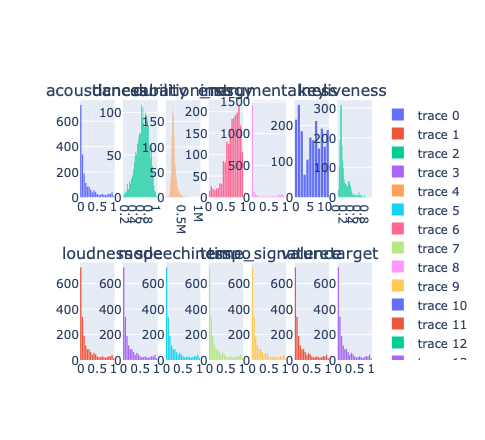

In [47]:
for p1 in p2_:
    for p2 in p1_:
        if i<8:
            fig.add_trace(go.Histogram(x=df[p2]),row=1,col=i)
            i=i+1
        if j<8:
            fig.add_trace(go.Histogram(x=df[p1]),row=2,col=j)
            j=j+1
fig.update_layout(bargap=.2,width=1000,height=440)        

The majority of our conclusions based on the statistical data were correct.In terms of Acousticness, duration, energy, Instrumentalness, liveness, loudness, and Speechiness, we encountered a number of outliers.The distribution of the majority of the input variables is not gaussian.

## Outliers Removal

When dealing with non-gaussian distributions, a useful statistic is the interquartile range, or IQR.The difference between the 75th and 25th percentiles is used to calculate the IQR.Limits on samples can be set using the IQR to find outliers.The IQR's k factor lies either below or above the 75th percentile.

## Interquartile Range Method

In [48]:
def inter_rem(df,feature_sel='fea'):
    q_25=percentile(df[feature_sel],25)
    q_75=percentile(df[feature_sel],75)
    range=1.5*(q_75-q_25)
    lower=q_25-range
    upper=q_75+range
    df=df[(df[feature_sel]>=lower)&(df[feature_sel]<=upper)]
    return df

In [49]:
df_no_outlier=df.copy()
df_no_outlier=inter_rem(df,'acousticness')
len(df_no_outlier)

1823

## Z-Score Method

Another useful strategy for dealing with gaussian distribution outliers is the Z-score.The Zscore is calculated by subtracting all data points from the range of three standard deviations and using the standard deviation.Those data points remain a component of the unlikely and uncommon event.

In [50]:
def zscore_rem(df,feature_sel='fea'):
    mean=np.mean(df[feature_sel])
    std_dev=np.std(df[feature_sel])
    std_range=3*std_dev
    lower=mean-std_range
    upper=mean+std_range
    df=df[(df[feature_sel]>=lower)&(df[feature_sel]<=upper)]
    return df

In [51]:
zscore_rem=zscore_rem(df,feature_sel='acousticness')
len(zscore_rem)

1993

In [52]:
i=1
j=1
p1_=df_no_outlier[sel_cols].columns[0:7]
p2_=df_no_outlier[sel_cols].columns[0:7]
fig=make_subplots(rows=2,cols=7,start_cell='top-left',subplot_titles=('acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target'))

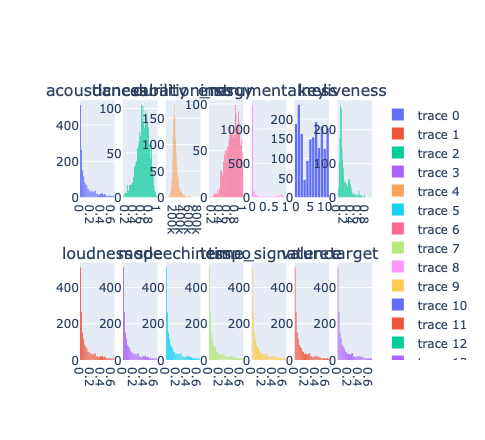

In [53]:
for p1 in p2_:
    for p2 in p1_:
        if i<8:
            fig.add_trace(go.Histogram(x=df_no_outlier[p2]),row=1,col=i)
            i=i+1
        if j<8:
            fig.add_trace(go.Histogram(x=df_no_outlier[p1]),row=2,col=j)
            j=j+1
fig.update_layout(bargap=.2,width=1000,height=440)        

## Check Correlation

<AxesSubplot:>

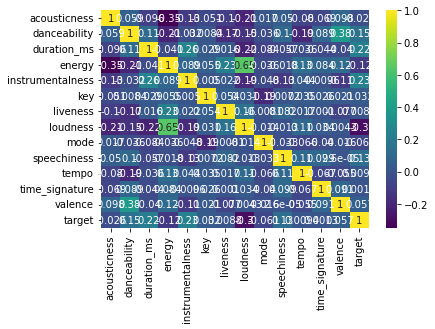

In [54]:
corr=df_no_outlier.corr()
sns.heatmap(corr,annot=True,cmap='viridis')

Green indicates a medium correlation, purple indicates a negative correlation, and yellow indicates a high correlation.

We see almost no correlation with the target in our correlation matrix.Low correlation is the strongest with the target.Instrumentalness is approximately 0.23.

Logistic regression may not be applicable to this dataset.

## Column Inputs and Target Variable

In [55]:
cols_inp=df.columns.tolist()[:-1]
col_target='target'

In [56]:
cols_inp

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'song_title',
 'artist']

In [57]:
col_target

'target'

## Train, Validation and Test sets

Train, Validation, and Test sets will be created.

The data are used to train models.The validation set will be used to select hyperparameters, and the test set will be used for final measurements.

In [58]:
val_df_train,df_test=train_test_split(df_no_outlier,test_size=0.2,random_state=2)
df_train,df_val=train_test_split(val_df_train,test_size=0.25,random_state=2)

In [59]:
df_train.shape

(1093, 16)

In [60]:
df_val.shape

(365, 16)

In [61]:
df_test.shape

(365, 16)

In [62]:
cols_inp_train=df_train[cols_inp].copy()
cols_inp_target=df_train[col_target].copy()

cols_inp_val=df_val[cols_inp].copy()
cols_val_target=df_val[col_target].copy()

inps_test=df_test[cols_inp].copy()
target_test=df_test[col_target].copy()

In [63]:
cols_inp_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
491,0.013200,0.677,271480,0.860,0.011900,1,0.0487,-5.074,1,0.0348,121.989,4.0,0.7930,Don't Deny Your Heart,Hot Chip
698,0.005250,0.700,307467,0.675,0.000000,2,0.6570,-6.362,1,0.1490,124.882,4.0,0.2270,No New Friends - SFTB Remix,DJ Khaled
540,0.104000,0.241,194600,0.588,0.000420,7,0.0870,-6.914,1,0.0313,171.882,4.0,0.5060,Pictures Of Matchstick Men,Status Quo
1849,0.371000,0.814,268040,0.431,0.000000,8,0.3350,-9.125,1,0.0936,129.957,4.0,0.5460,My Little Secret,Xscape
2005,0.021600,0.526,216072,0.825,0.000001,5,0.4260,-3.506,0,0.0875,150.181,4.0,0.1080,Spoon Me - Slushii Remix,Elliphant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,0.302000,0.696,292987,0.521,0.000000,10,0.0565,-8.465,0,0.3320,100.000,4.0,0.4710,No Role Modelz,J. Cole
942,0.000017,0.499,395200,0.506,0.941000,9,0.0784,-16.778,0,0.1490,186.328,3.0,0.3670,Remember,Gino Soccio
1326,0.001250,0.217,255725,0.980,0.001390,5,0.2870,-3.332,1,0.1330,139.024,4.0,0.0658,Plagues,The End At The Beginning
1956,0.441000,0.762,193160,0.705,0.000000,4,0.1180,-5.082,1,0.0991,119.439,4.0,0.7760,Shaddap You Face,Joe Dolce


## Numerical and Categorial Columns Identification

In [64]:
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
song_title           object
artist               object
target                int64
dtype: object

## Numeric Columns

In [65]:
cols_numeric=cols_inp_train.select_dtypes(include=['float64','int64']).columns.tolist()

In [66]:
cols_numeric

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

## Data Preprocessing

## Feature Scaling

Because machine learning models learn by mapping inputs to outputs, data scaling is crucial.The model will have trouble learning and will not perform well in a real-world situation if the inputs have different ranges and scales.Acousticness ranges from 0 to 0.99, key ranges from 1 to 11, and tempo ranges from 47.85 to 219.33 in our instance.The features affect the range of the dataset.

We will use normalization to resolve this issue.
Rescaling the original data's range to be between 0 and 1 is normalization.

Some of you may wonder why standardization isn't used.The gaussian distribution, also known as the normal distribution, is required for standardization.As far as we could tell, the majority of the features in our dataset have a distribution that is not gaussian.We can still use standardize, but the outcome might not be what we wanted.

In [67]:
cols_inp_train[cols_numeric].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,0.118758,0.630171,241087.675206,0.716446,0.102856,5.438243,0.195080,-6.418242,0.608417,0.095066,121.689742,3.986276,0.516843
std,0.154064,0.154949,71212.357197,0.168370,0.242131,3.659635,0.162326,2.705178,0.488328,0.092823,25.802387,0.224004,0.235189
min,0.000003,0.123000,52006.000000,0.118000,0.000000,0.000000,0.018800,-22.751000,0.000000,0.023100,64.992000,3.000000,0.035900
25%,0.007670,0.537000,200080.000000,0.593000,0.000000,2.000000,0.089800,-7.697000,0.000000,0.038400,100.338000,4.000000,0.325000
50%,0.045300,0.640000,226840.000000,0.737000,0.000029,6.000000,0.128000,-6.012000,1.000000,0.056300,121.999000,4.000000,0.516000
75%,0.172000,0.745000,263213.000000,0.857000,0.019700,9.000000,0.250000,-4.598000,1.000000,0.112000,135.965000,4.000000,0.704000
max,0.643000,0.950000,825027.000000,0.998000,0.976000,11.000000,0.969000,-0.935000,1.000000,0.816000,219.331000,5.000000,0.992000


In [68]:
cols_inp_train[cols_numeric]=MinMaxScaler().fit_transform(cols_inp_train[cols_numeric])
cols_inp_val[cols_numeric]=MinMaxScaler().fit_transform(cols_inp_val[cols_numeric])
inps_test[cols_numeric]=MinMaxScaler().fit_transform(inps_test[cols_numeric])

In [69]:
inps_test[cols_numeric].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.185078,0.595163,0.276697,0.679960,0.136602,0.470486,0.205015,0.682261,0.580822,0.151703,0.399794,0.493151,0.500981
std,0.234606,0.182219,0.104177,0.193458,0.278388,0.332413,0.181853,0.147151,0.494102,0.190196,0.202083,0.086648,0.252752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011080,0.478107,0.219370,0.581451,0.000000,0.090909,0.084055,0.607654,0.000000,0.029905,0.240422,0.500000,0.305123
50%,0.087019,0.617751,0.253859,0.699168,0.000080,0.545455,0.125580,0.703296,1.000000,0.072289,0.396913,0.500000,0.499517
75%,0.289053,0.714793,0.306267,0.824019,0.045026,0.727273,0.289926,0.783408,1.000000,0.171687,0.524177,0.500000,0.682096
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Encoded and Categorial Columns

In [70]:
cols_encoded=['mode']
cols_categorial=cols_inp_train.select_dtypes(include=['object']).columns.tolist()

In [71]:
cols_categorial

['song_title', 'artist']

## Label Encoding

Each column value is transformed into a number with label encoding.Between 0 and n_categories-1, the new value is.Some of you will wonder why categorical columns are not hot encoded.

The dataset's dimensionality is the issue with one-hot encoding.We have approximately 1000 distinct artists and 1826 distinct songs.Our dataset will have a lot of parameters, and the model will be too complicated to learn the data if we encode each of those values individually.

As a result, we will assign a number to the encoded categorical columns (artist and song title) of our dataset.

In [72]:
cols_inp_train['song_title']=LabelEncoder().fit_transform(cols_inp_train['song_title'])
cols_inp_val['song_title']=LabelEncoder().fit_transform(cols_inp_val['song_title'])
inps_test['song_title']=LabelEncoder().fit_transform(inps_test['song_title'])

In [73]:
cols_inp_train['artist']=LabelEncoder().fit_transform(cols_inp_train['artist'])
cols_inp_val['artist']=LabelEncoder().fit_transform(cols_inp_val['artist'])
inps_test['artist']=LabelEncoder().fit_transform(inps_test['artist'])

In [74]:
cols_inp_train[cols_categorial]

,song_title,artist
491,226,330
698,633,188
540,692,652
1849,612,784
2005,839,245
...,...,...
1409,636,351
942,738,298
1326,695,689
1956,786,373


In [75]:
train_X=cols_inp_train[cols_numeric+cols_encoded]
val_X=cols_inp_val[cols_numeric+cols_encoded]
test_X=inps_test[cols_numeric+cols_encoded]

In [76]:
val_X

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mode
1810,0.325612,0.564634,0.305430,0.525547,0.000003,0.000000,0.100275,0.412992,1.0,0.034509,0.240965,0.5,0.499035,1.0
1874,0.051072,0.626829,0.212072,0.691971,0.000016,0.636364,0.126603,0.735246,0.0,0.114710,0.298065,0.5,0.699635,0.0
849,0.040578,0.701220,0.330357,0.830657,0.420455,0.545455,0.027816,0.687208,0.0,0.106998,0.475039,0.5,0.879854,0.0
1251,0.016504,0.554878,0.256459,0.618978,0.000000,0.727273,0.174679,0.712016,1.0,0.033160,0.284247,0.5,0.506544,1.0
1669,0.055393,0.728049,0.253001,0.481752,0.000000,0.454545,0.081387,0.559047,0.0,0.058994,0.742831,0.5,0.963527,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0.293204,0.746341,0.294735,0.289051,0.000000,0.818182,0.110577,0.669740,0.0,0.033160,0.269777,0.5,0.509762,0.0
983,0.212956,0.613415,0.316500,0.509489,0.007076,0.545455,0.662317,0.550980,1.0,0.100829,0.226287,0.5,0.348852,1.0
533,0.012553,0.289024,0.000000,0.967883,0.907025,0.000000,0.410485,0.882999,1.0,0.125892,0.662249,0.5,0.397125,1.0
888,0.737652,0.823171,0.176892,0.402920,0.002903,0.181818,0.023008,0.549281,1.0,0.250048,0.210821,0.5,0.921691,1.0


## Train Logistic Regression

The binary output of the logistic regression model is supervised learning.It uses the sigmoid function's weighted sum of the variables in the inputs and produces a binary variable of either 0 or 1.

In [77]:
lg=LogisticRegression(solver='liblinear').fit(train_X,cols_inp_target)

In [78]:
pred=lg.predict(train_X)

In [79]:
accuracy_score(cols_inp_target,pred)

0.707227813357731

In [80]:
predict=lg.predict(val_X)
accuracy_score(cols_val_target,predict)

0.6821917808219178

The features have a low correlation with the target, as we saw earlier with the correlation matrix.As a result, logistic regression might not be the best approach to the issue.

## Decision Tree Classifier

A supervised learning model called Decision Tree divides the data on a regular basis based on a particular parameter.Two primary parameters could be used to define the tree:

Nodes of Decision:where there is a split
Decision Leaves:the results

This time, we will attempt to eliminate the outlier by utilizing the Zscore on the danceability column and omitting the preprocessing step.To be effective, the decision tree does not require that the data be preprocessed.

## Model Training

In [83]:
val_df_train,df_test=train_test_split(df_no_outlier,test_size=0.2,random_state=2)
df_train,df_val=train_test_split(val_df_train,test_size=0.25,random_state=2)

cols_inp=df.columns.tolist()[:-1]
col_target='target'

cols_numeric=cols_inp_train.select_dtypes(include=['float64','int64']).columns.tolist()
cols_encoded=['mode']
cols_categorial=cols_inp_train.select_dtypes(include=['object']).columns.tolist()

cols_inp_train=df_train[cols_inp].copy()
cols_inp_target=df_train[col_target].copy()

cols_inp_val=df_val[cols_inp].copy()
cols_val_target=df_val[col_target].copy()

inps_test=df_test[cols_inp].copy()
target_test=df_test[col_target].copy()

train_X=cols_inp_train[cols_numeric+cols_encoded]
val_X=cols_inp_val[cols_numeric+cols_encoded]
test_X=inps_test[cols_numeric+cols_encoded]

In [88]:
dtc=DecisionTreeClassifier(random_state=2).fit(train_X,cols_inp_target)

## Predictions

In [85]:
pred=dtc.predict(train_X)

## Evaluating Model

In [86]:
accu=accuracy_score(cols_inp_target,pred)
accu*100

100.0

In [87]:
pred_val=dtc.predict(val_X)
accu_val=accuracy_score(cols_val_target,pred_val)
accu_val*100

66.02739726027397

## Decision Tree Plot 

[Text(0.5133928571428571, 0.9166666666666666, 'instrumentalness <= 0.001\ngini = 0.499\nsamples = 1093\nvalue = [523, 570]'),
 Text(0.2857142857142857, 0.75, 'speechiness <= 0.128\ngini = 0.469\nsamples = 667\nvalue = [416, 251]'),
 Text(0.14285714285714285, 0.5833333333333334, 'danceability <= 0.781\ngini = 0.413\nsamples = 497\nvalue = [352, 145]'),
 Text(0.07142857142857142, 0.4166666666666667, 'danceability <= 0.368\ngini = 0.378\nsamples = 423\nvalue = [316, 107]'),
 Text(0.03571428571428571, 0.25, 'duration_ms <= 0.225\ngini = 0.498\nsamples = 49\nvalue = [23, 26]'),
 Text(0.017857142857142856, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05357142857142857, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.25, 'loudness <= 0.714\ngini = 0.339\nsamples = 374\nvalue = [293, 81]'),
 Text(0.08928571428571429, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.4166666666666667, 'valence <= 0.39\ng

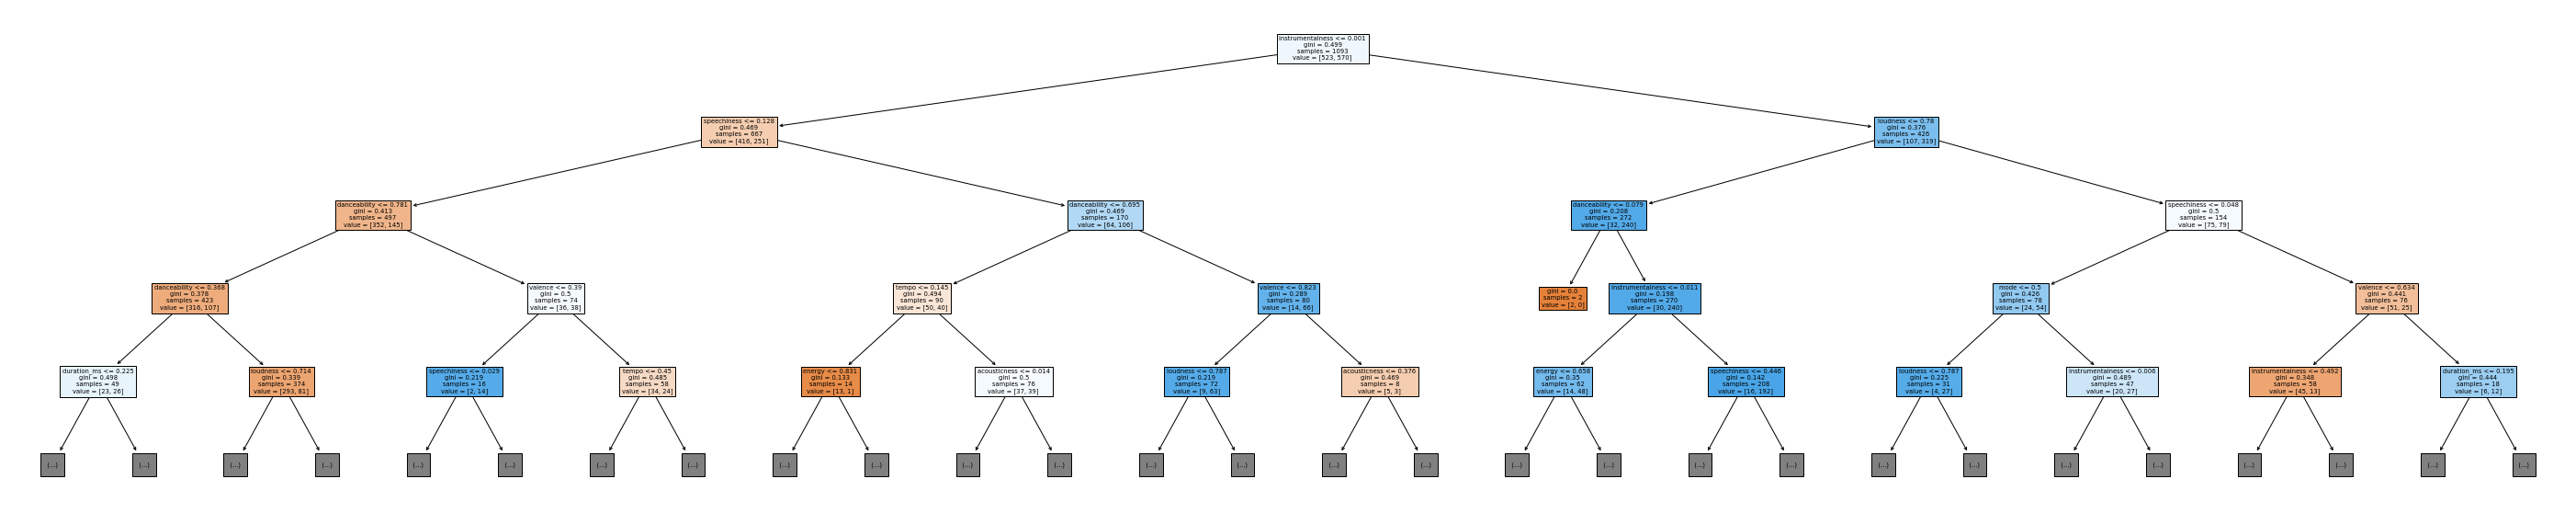

In [66]:
plt.figure(figsize=(50,10))
plot_tree(dtc,feature_names=train_X.columns,max_depth=4,filled=True)

In [67]:
text=export_text(dtc,max_depth=10,feature_names=list(train_X.columns))
print(text[:5000])

|--- instrumentalness <= 0.00
|   |--- speechiness <= 0.13
|   |   |--- danceability <= 0.78
|   |   |   |--- danceability <= 0.37
|   |   |   |   |--- duration_ms <= 0.22
|   |   |   |   |   |--- danceability <= 0.33
|   |   |   |   |   |   |--- speechiness <= 0.01
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- speechiness >  0.01
|   |   |   |   |   |   |   |--- instrumentalness <= 0.00
|   |   |   |   |   |   |   |   |--- acousticness <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- acousticness >  0.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- instrumentalness >  0.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- danceability >  0.33
|   |   |   |   |   |   |--- danceability <= 0.35
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- danceability >  0.35
|   |   |   |   |   |   |   |--- key <= 0.68
|   |   |   |   |   |   |   |  

## Feature Importance

In [68]:
dtc.feature_importances_

array([0.09042591, 0.11588008, 0.04976901, 0.06740969, 0.18021204,
       0.02703607, 0.0476153 , 0.11505654, 0.00244429, 0.14689072,
       0.08860536, 0.00170227, 0.05482117, 0.01213156])

In [69]:
fea_imp=pandas.DataFrame({'feature':train_X.columns,
                         'importance':dtc.feature_importances_}).sort_values('importance',ascending=False)

In [70]:
fea_imp.head()

,feature,importance
4,instrumentalness,0.180212
9,speechiness,0.146891
1,danceability,0.115880
7,loudness,0.115057
0,acousticness,0.090426


<AxesSubplot:xlabel='importance', ylabel='feature'>

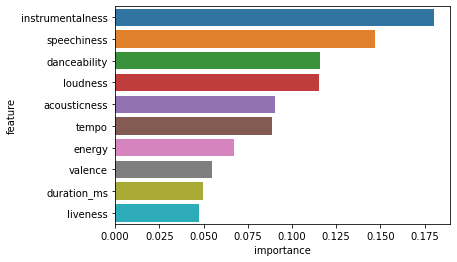

In [71]:
sns.barplot(data=fea_imp.head(10),x='importance',y='feature')

The characteristics of instrumentalness, energy, loudness, and speechiness are the model's most significant features.By tuning the hyperparameters, we will attempt to enhance the model.

## Enhance the Model

The max_depth parameter will be adjusted.

The number of training examples used by the model is controlled by a hyperparameter called max depth.

Because the model learned all of the training examples, we had 100% accuracy in the training set earlier.

As a result, it was difficult for it to generalize within the validation set.Overfitting can be reduced by tuning the max_depth parameter.

In [72]:
dtc=DecisionTreeClassifier(max_depth=7,random_state=2)
dtc.fit(train_X,cols_inp_target)

DecisionTreeClassifier(max_depth=7, random_state=2)

In [73]:
dtc.score(train_X,cols_inp_target)

0.8838060384263495

In [74]:
dtc.score(val_X,cols_val_target)

0.6794520547945205

## Improving Model

In [75]:
def error(max_depth):
    dtc=DecisionTreeClassifier(max_depth=max_depth,random_state=2)
    dtc.fit(train_X,cols_inp_target)
    accu_train=1-dtc.score(train_X,cols_inp_target)
    accu_val=1-dtc.score(val_X,cols_val_target)
    return {'max_depth':max_depth,'train error':accu_train,'val error':accu_val}

In [76]:
errors=pandas.DataFrame([error(max_depth) for max_depth in range(1,16)])

In [77]:
errors.sort_values('val error',ascending=True).head(10)

,max_depth,train error,val error
2,3,0.252516,0.290411
4,5,0.190302,0.312329
8,9,0.072278,0.317808
6,7,0.116194,0.320548
1,2,0.289113,0.323288
7,8,0.091491,0.326027
11,12,0.031107,0.326027
3,4,0.231473,0.328767
5,6,0.151876,0.331507
10,11,0.043001,0.334247


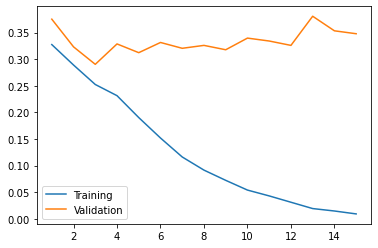

In [78]:
plt.plot(errors['max_depth'],errors['train error'])
plt.plot(errors['max_depth'],errors['val error'])
plt.legend(['Training','Validation'])

In [79]:
dtc=DecisionTreeClassifier(max_depth=9,random_state=2)
dtc.fit(train_X,cols_inp_target)
dtc.score(train_X,cols_inp_target)

0.9277218664226898

In [80]:
dtc.score(val_X,cols_val_target)

0.6821917808219178

In [81]:
dtc=DecisionTreeClassifier(max_leaf_nodes=50,random_state=2)
dtc.fit(train_X,cols_inp_target)
dtc.score(train_X,cols_inp_target)

0.879231473010064

In [82]:
dtc.score(val_X,cols_val_target)

0.6794520547945205

In [83]:
dtc=DecisionTreeClassifier(max_depth=9,max_leaf_nodes=40,random_state=2)
dtc.fit(train_X,cols_inp_target)
dtc.score(train_X,cols_inp_target)

0.8581884720951509

In [84]:
dtc.score(val_X,cols_val_target)

0.6876712328767123

For the validation test, our accuracy score this time is 68%.We could still adjust other parameters to make the model better, but let's try a Random Forest model instead.

## Random Forest Classifier

A supervised learning model known as Random Forest makes use of ensemble learning to generate a large number of decision trees, whose output is determined by the mean of those trees outputs.Ensemble learning is a method that solves problems by combining numerous classifiers.

In [85]:
rfc=RandomForestClassifier(n_jobs=1,random_state=2)
rfc.fit(train_X,cols_inp_target)

RandomForestClassifier(n_jobs=1, random_state=2)

In [86]:
rfc.score(train_X,cols_inp_target)

1.0

In [87]:
rfc.score(val_X,cols_val_target)

0.7561643835616438

Our random forest model, like the decision tree, overfits the train set's data, but it improves accuracy by 75%.

In [88]:
fea_imp=pandas.DataFrame({'feature':train_X.columns,
                         'importance':rfc.feature_importances_}).sort_values('importance',ascending=False)

In [89]:
fea_imp

,feature,importance
4,instrumentalness,0.163316
7,loudness,0.121133
9,speechiness,0.105972
1,danceability,0.098582
2,duration_ms,0.086670
10,tempo,0.076233
12,valence,0.073136
3,energy,0.072983
6,liveness,0.070874
0,acousticness,0.070551


<AxesSubplot:xlabel='importance', ylabel='feature'>

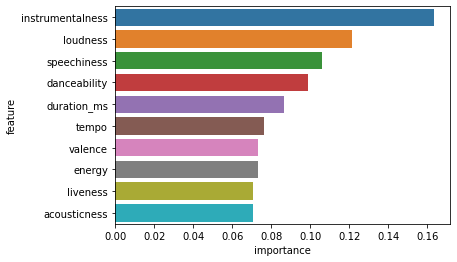

In [90]:
sns.barplot(data=fea_imp.head(10),x='importance',y='feature')

## Hyperparameter Tuning

N_ESTIMATOR 
The number of estimators will be adjusted.

A hyperparameter called N_estimators determines how many trees the model will use.

In [91]:
def n_error(n):
    rfc=RandomForestClassifier(n_jobs=-1,n_estimators=n,random_state=2)
    rfc.fit(train_X,cols_inp_target)
    accu_train=1-rfc.score(train_X,cols_inp_target)
    accu_val=1-rfc.score(val_X,cols_val_target)
    return {'n_estimator':n,'train error':accu_train,'val error':accu_val}

In [92]:
errors=pandas.DataFrame([n_error(n) for n in range(100,500)])

In [93]:
errors.sort_values('val error',ascending=True).head(10)

,n_estimator,train error,val error
82,182,0.0,0.216438
106,206,0.0,0.216438
108,208,0.0,0.216438
109,209,0.0,0.216438
133,233,0.0,0.219178
134,234,0.0,0.219178
135,235,0.0,0.219178
137,237,0.0,0.219178
140,240,0.0,0.219178
142,242,0.0,0.219178


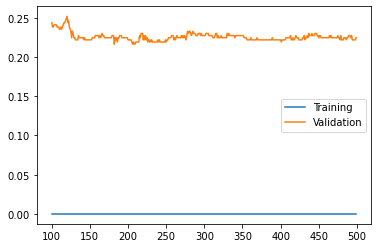

In [94]:
plt.plot(errors['n_estimator'],errors['train error'])
plt.plot(errors['n_estimator'],errors['val error'])
plt.legend(['Training','Validation'])

In [89]:
rfc=RandomForestClassifier(n_jobs=-1,n_estimators=112,max_features=3,max_depth=16,random_state=2)

In [90]:
rfc.fit(train_X,cols_inp_target)

RandomForestClassifier(max_depth=16, max_features=3, n_estimators=112,
                       n_jobs=-1, random_state=2)

In [94]:
rfc.score(val_X,cols_val_target)

0.7890410958904109

In [95]:
rfc.score(test_X,target_test)

0.7342465753424657

On the validation test, the accuracy of the model is 78%, and on the test set, it is 73%.It could deduce that our model is somewhat adept at generalizing to new data.

In [104]:
def random(inps):
    return np.random.choice([0,1],len(inps))
def save(inps):
    return np.full(len(inps),1)
def discard(inps):
    return np.full(len(inps),0)

In [ ]:
guess=

## Prediction

In [96]:
df_no_outlier.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist', 'target'],
      dtype='object')

In [97]:
song={'acousticness':0.0301, 'danceability':0.583, 'duration_ms':224092, 'energy':0.891,
       'instrumentalness':0.000003, 'key':7, 'liveness':0.129, 'loudness':-3.495, 'mode':1,
       'speechiness':0.447, 'tempo':149.843, 'time_signature':4.0, 'valence':0.321, 'song_title':'Without U',
       'artist':'Steve Aoki'
}

In [105]:
def prediction(song):
    df=pandas.DataFrame([song])
    X_song=df[cols_numeric+cols_encoded]
    predict=rfc.predict(X_song)[0]
    prob=rfc.predict_proba(X_song)[0][list(rfc.classes_).index(pred)]
    if predict==0:
        return 'Discard',prob
    elif predict==1:
        return 'Save',prob

In [106]:
prediction(song)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()